In [267]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.nn.functional as F

In [268]:
data = load_iris()
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Prepare the Data

In [269]:
x = data["data"][:, :3]

print(x)

#y = np.where(data["target"] >= 1, 1, 0)
y = np.array(data["target"])#.reshape(1, -1)

#print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)


[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

In [270]:
class IrisNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc4 = nn.Linear(4, 1)

        device = (
            "cuda"
            if torch.cuda.is_available()
            else "mps"
            if torch.backends.mps.is_available()
            else "cpu"
        )
        self.to()

    def forward(self, x):
        y = F.relu(self.fc1(x))
        y = F.relu(self.fc2(y))
        y = F.leaky_relu(self.fc4(y))
        return y

    def my_train(self, x_train, y_train):
        # Initialize loss function and optimizer with model parameters and learning rate.
        loss = nn.MSELoss()
        # For binary values:
        # loss = nn.BCELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.009)

        # Initialize error list for later visualization.
        self.epoch_errors = []

        # Train the model in n epochs.
        for epoch in range(500):
            # Set all gradients to zero since it is a new iteration and optimization round.
            optimizer.zero_grad()
            # Compute error on training data.
            # Do some transformations on the data to get it in the right tensor shape for the model.
            error = loss(self(torch.from_numpy(x_train).type(
                torch.FloatTensor)), torch.from_numpy(y_train).unsqueeze(1).type(torch.FloatTensor))
            # Store error for later visualization.
            self.epoch_errors.append(error.item())
            # Compute gradients for all the parameters.
            error.backward()
            # Update all parameters using the gradients and optimizer formula.
            optimizer.step()


In [271]:


model = IrisNN()
model.my_train(x_train, y_train)


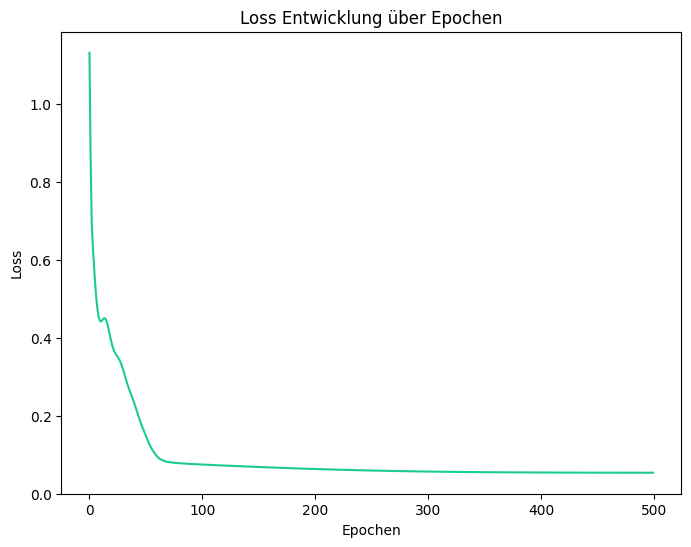

In [272]:
# Plot error evolution over the epochs.
plt.figure(figsize=(8, 6))
plt.plot(model.epoch_errors, color="#1ACC94")
plt.title('Loss Entwicklung über Epochen')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.show()

In [281]:
# predict a single value
#foo = np.array([5.1, 3.5, 1.4])
foo = np.array([6.2, 3.4, 5.4])
y_pred = model(torch.from_numpy(foo).type(
    torch.FloatTensor)).detach().numpy()

print(y_pred[0].round())

2.0
